<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Подключение-необходимых-библиотек" data-toc-modified-id="Подключение-необходимых-библиотек-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>Подключение необходимых библиотек</a></span><ul class="toc-item"><li><span><a href="#Игнорируем-предупреждения" data-toc-modified-id="Игнорируем-предупреждения-0.1.1"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>Игнорируем предупреждения</a></span></li></ul></li><li><span><a href="#Объявление-констант" data-toc-modified-id="Объявление-констант-0.2"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>Объявление констант</a></span></li></ul></li><li><span><a href="#Знакомство-с-данными" data-toc-modified-id="Знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Знакомство с данными</a></span></li><li><span><a href="#Разбиение-данных-для-дальнейшего-обучения" data-toc-modified-id="Разбиение-данных-для-дальнейшего-обучения-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Разбиение данных для дальнейшего обучения</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Создадим-класс-линейной-регресии-для-нашей-задачи-обучения" data-toc-modified-id="Создадим-класс-линейной-регресии-для-нашей-задачи-обучения-4.0.1"><span class="toc-item-num">4.0.1&nbsp;&nbsp;</span>Создадим класс линейной регресии для нашей задачи обучения</a></span></li><li><span><a href="#Проверим-качество-модели-на-исходных-признаках" data-toc-modified-id="Проверим-качество-модели-на-исходных-признаках-4.0.2"><span class="toc-item-num">4.0.2&nbsp;&nbsp;</span>Проверим качество модели на исходных признаках</a></span></li><li><span><a href="#Умножение-на-обратимую-матрицу" data-toc-modified-id="Умножение-на-обратимую-матрицу-4.0.3"><span class="toc-item-num">4.0.3&nbsp;&nbsp;</span>Умножение на обратимую матрицу</a></span></li></ul></li></ul></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Подведение-итогов" data-toc-modified-id="Подведение-итогов-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Подведение итогов</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Необходимо защитить данные клиентов страховой компании «Хоть потоп». 

**Задача:** разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. 

При преобразовании качество моделей машинного обучения не должно ухудшаться. 

# План работы

1. Знакомство с данными. 
2. Умножение признаки на обратимую матрицу и проверим качество линейной регрессии.
3. Введение алгоритм преобразования данных.
4. Программирование алгоритма преобразования данных с матричными операциями.

# Описание данных

Набор данных находится в файле /datasets/insurance.csv
Ccылка на скачивание датасета: https://code.s3.yandex.net/datasets/insurance.csv

Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.

Целевой признак: количество страховых выплат клиенту за последние 5 лет.

### Подключение необходимых библиотек

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#### Игнорируем предупреждения

In [2]:
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None

### Объявление констант

In [3]:
RS = 12345

## Знакомство с данными

In [4]:
# обозначим пути к данным

pth_1 = r'C:\Users\Елена Тюлькина\Downloads\insurance.csv'
pth_2 = 'insurance.csv'

if os.path.exists(pth_1):
    df = pd.read_csv(pth_1)
elif os.path.exists(pth_2):
    df = pd.read_csv(pth_2)
else:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [5]:
# Функция возвращает основную информацию о датафрейме

def hello_df(data):
    
    display(df.head(5))
    print('     ')
    
    print(df.info())
    print('     ')
    
    print('Дубликатов в таблице:', df.duplicated().sum())
    print('     ')
    
    print('Форма таблицы:{}'.format(df.shape))
    print('     ')
    
    return (df.isna().mean()*100).sort_values(ascending=False).to_frame().rename(
    columns = {0:'Процент_пропусков'}).style.background_gradient('coolwarm').format("{:.1f}")

In [6]:
hello_df(df)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


     
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB
None
     
Дубликатов в таблице: 153
     
Форма таблицы:(5000, 5)
     


,Процент_пропусков
Пол,0.0
Возраст,0.0
Зарплата,0.0
Члены семьи,0.0
Страховые выплаты,0.0


В таблице 153 дубликата. У нас нет однозначного идентификатора клиента типа id или ФИО, соответственно мы не можем со 100% уверенностью говорить, что все совпадения являются дубликатами. Но тк их мало, удалим

In [7]:
data = df.drop_duplicates()

In [8]:
print(data.duplicated().sum())

0


In [9]:
data.shape

(4847, 5)

In [10]:
def hist_df(df):
    for column in df.columns[1:]:
        data = df[[column]]
        plt.hist(data)
        plt.title(column)
        plt.xlabel('Значение')
        plt.ylabel('Количество')
        plt.show()

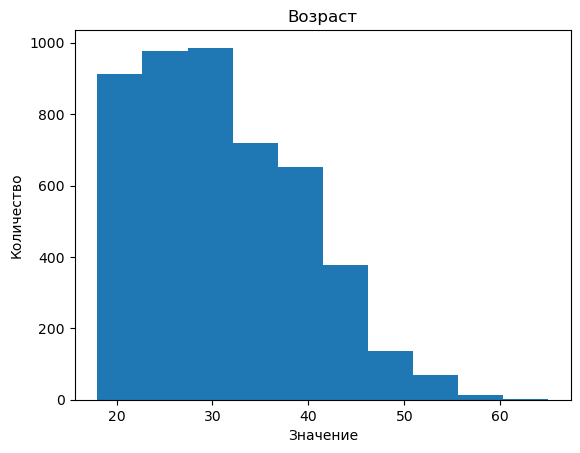

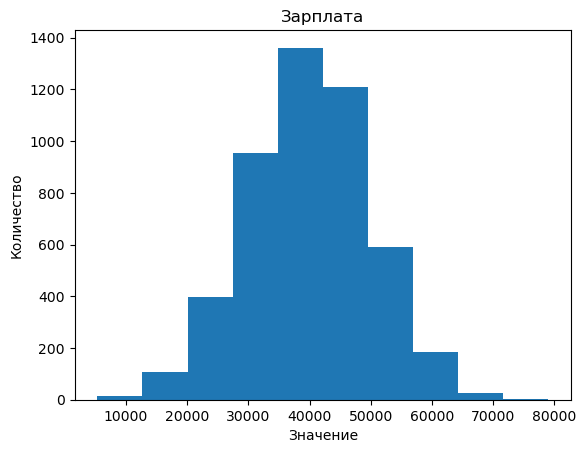

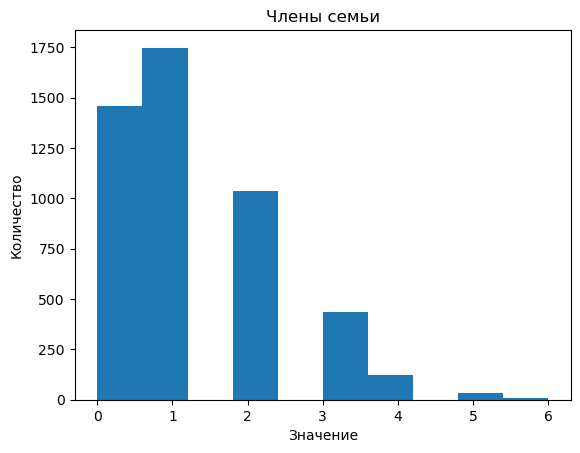

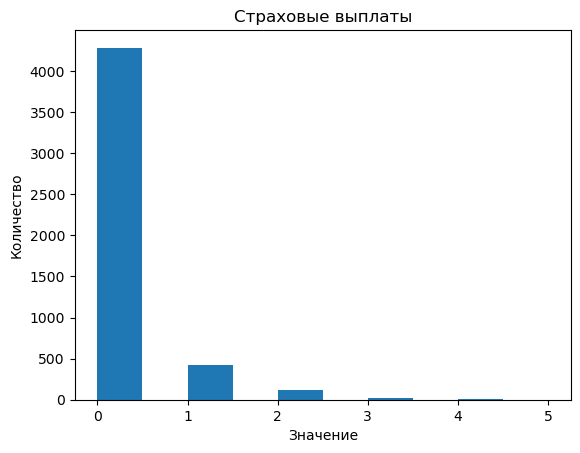

In [11]:
hist_df(data)

Распределение признаков выглядит естественно. Отметим, что кол-во страховых выплат у большинства семей составляет 0.

In [12]:
data[['Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']].corr(
    method='spearman').style.background_gradient(cmap='coolwarm')

,Возраст,Зарплата,Члены семьи,Страховые выплаты
Возраст,1.000000,-0.018972,-0.003414,0.555655
Зарплата,-0.018972,1.000000,-0.027361,-0.003878
Члены семьи,-0.003414,-0.027361,1.000000,-0.032201
Страховые выплаты,0.555655,-0.003878,-0.032201,1.000000


Коэффициент кореляции практически у всех признаков низкий.

**Замечания по первичному знакомству с данными:**

1. Было обнаружено и устранено 153 дубликата;
2. Данные полные - в них нет пропусков;
3. Распределение данных выглядит нормально.

Точек данных после обработки - 4847 признаков - 5. Целевые признаки хранятся в столбце: "Страховые выплаты"

## Разбиение данных для дальнейшего обучения

In [13]:
# выделим признаки

target = data['Страховые выплаты']
features = data.drop(['Страховые выплаты'], axis=1)

In [14]:
# разобьём данные обучающую и валидационную+тестовую выборки

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=RS)

In [15]:
features_train.shape

(3635, 4)

In [16]:
target_train.shape

(3635,)

In [17]:
features_test.shape

(1212, 4)

In [18]:
target_test.shape

(1212,)

## Умножение матриц

**Вопрос:** Изменится ли качество линейной регрессии, если умножить признаки на обратимую матрицу?

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Если умножить признаки на обратимую матрицу, то качество линейной регрессии не изменится.

**Обоснование:** 

Для решения задачи воспользовались следующими свойствами матриц:

1. $$
A(BC) = (AB)C
$$
2. $$
(AB)^{T} = B^{T}A^{T}
$$
3. $$
AE = EA = A
$$
4. $$
A^{-1} A = E
$$
5. $$
(ABC)^{-1} = C^{-1}B^{-1}A^{-1}
$$

Пусть обратимая матрица $$P$$
Тогда новые признаки $$XP$$

Формула обучения с матрицей признаков, умноженной на обратимую матрицу, принимает вид

$$
w = ((XР)^{T} XP)^{-1} (XP)^T y
$$ 

Приступим к преобразованию формулы. Используем 2 свойство:

$$ 
w = (P^{T}X^{T} XP)^{-1} P^{T}X^{T} y
$$ 

Используем 1 свойство:

$$ 
w = (P^{T}(X^{T} X)P)^{-1} P^{T}X^{T} y
$$ 

Раскрываем скобки, руководствуясь 5-м свойством:

$$ 
w = P^{-1}(X^{T} X)^{-1}(P^{T})^{-1} P^{T}X^{T} y
$$ 

Используя 4 свойство, получаем единичную матрицу:

$$ 
w = P^{-1}(X^{T} X)^{-1}EX^{T} y
$$ 

Тогда благодаря 3 свойству формула приобретает вид:

$$ 
w = P^{-1}(X^{T} X)^{-1}X^{T} y
$$ 

Далее вернумся к условию:

$$ 
w = (X^T X)^{-1} X^T y
$$ 

Тогда справедливо равенство:
$$ 
w = P^{-1} w
$$ 

Мы видим, что вектор весов линейной регрессии изменён.
Проверим формулу предсказаний. Подставим туда новые значения

$$
a = XPP^{-1}w
$$
Упростим и получим: 

$$
a = XEw
$$
$$
a = Xw
$$

Получили исходную формулу предсказаний. Всё это доказывает, что качество линейной регресси не изменилось.

## Алгоритм преобразования
**Алгоритм**

Исходные признаки умножаются на случайную обратимую матрицу подходящего размера.
$$ 
w = P^{-1}(X^{T} X)^{-1}X^{T} y
$$ 

**Обоснование**

В предыдущем пункте доказано, что если умножить исхождные признаки Х на случайную обратимую матрицу Р, то предсказания не будут менятся, а значит - качество работы линейной регрессии тоже.

Запрограммируем алгоритм:


#### Создадим класс линейной регресии для нашей задачи обучения

In [19]:
class MyLinearRegression:
    
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

#### Проверим качество модели на исходных признаках

In [20]:
model = MyLinearRegression()
model.fit(features_train, target_train)
predictions = model.predict(features_test)

In [21]:
r2_first_data = r2_score(target_test, predictions)
mse_first_data = mean_squared_error(predictions, target_test)

print('R2 на исходных данных:', r2_first_data)
print('MSE на исходных данных:', mse_first_data)

R2 на исходных данных: 0.4230772749214826
MSE на исходных данных: 0.11955009374099715


Значение метрики R2 не отрицательное, не равно нулю и меньше единицы, а значит - линейная регрессия работает.

#### Умножение на обратимую матрицу

In [22]:
features.shape

(4847, 4)

In [23]:
# создадим рандомную матрицу 

matrix = np.random.normal(3, size=(4, 4))
matrix

array([[2.8778151 , 4.38719557, 3.17745199, 2.84917633],
       [2.67760296, 2.33160637, 2.89253559, 2.5360651 ],
       [3.37546822, 3.91674545, 3.04298706, 3.32463807],
       [2.91050399, 2.6205753 , 1.72399012, 5.42358865]])

In [24]:
# Проверка на обратимость

np.linalg.inv(matrix)

array([[-1.75367664, -0.48861634,  2.51911165, -0.39446902],
       [ 0.47135827, -0.62585291,  0.11829359, -0.0274841 ],
       [ 0.85676582,  1.11947622, -1.65244391,  0.03939025],
       [ 0.440999  ,  0.20876372, -0.88374785,  0.39682571]])

Проверка на обратимость пройдена

In [25]:
# Новые признаки, умноженные на обратимую матрицу

train_matrix = np.dot(features_train, matrix)
test_matrix = np.dot(features_test, matrix)

In [26]:
model_matrix = MyLinearRegression()
model_matrix.fit(train_matrix, target_train)
predictions = model_matrix.predict(test_matrix)

In [27]:
r2_second_data = r2_score(target_test, predictions)
mse_second_data = mean_squared_error(predictions, target_test)

print('R2 на исходных данных:', r2_second_data)
print('MSE на исходных данных:', mse_second_data)

R2 на исходных данных: 0.4230769988874167
MSE на исходных данных: 0.11955015094085603


Что и требовалось доказать: метрики не изменились.

**Промежуточный вывод:**

Подставляя новые значения в формулу обучения и в формулу предсказаний мы выяснили, что предсказания не поменяются, если исходные признаки умножить на обратимую матрицу. Мы создали класс линейной регрессии по формулам, обучили 2 модели с разным признаками и наглядно показали, что метрики R2 и MSE не меняют своё значение.

## Проверка алгоритма

Сравним работу нашего алгоритсма с работой алгоритма линейной регрессии из библиотеки sklearn.

**На исходных данных**

In [28]:
model_lr = LinearRegression()
model_lr.fit(features_train, target_train)
predictions_lr = model_lr.predict(features_test)

In [29]:
r2_lr = r2_score(target_test, predictions)
mse_lr = mean_squared_error(predictions_lr, target_test)

print('R2 на исходных данных:', r2_lr)
print('MSE на исходных данных:', mse_lr)

R2 на исходных данных: 0.4230769988874167
MSE на исходных данных: 0.11955009374099915


**На изменённых данных**

In [30]:
model_matrix_lr = LinearRegression()
model_matrix_lr.fit(train_matrix, target_train)
predictions_m_lr = model_matrix_lr.predict(test_matrix)

In [31]:
r2_lr_new = r2_score(target_test, predictions_m_lr)
mse_lr_new = mean_squared_error(predictions_m_lr, target_test)

print('R2 на изменённых данных:', r2_lr_new)
print('MSE на изменённых данных:', mse_lr_new)

R2 на изменённых данных: 0.42307727492093694
MSE на изменённых данных: 0.1195500937411102


**Декодировка данных**

Умножая признаки X на случайную необратимую матрицу P, мы получали новую матрицу. Oбозначим её B

$$ 
B = XP
$$ 

Тогда справедливо равенство

$$ 
BP^{-1} = XPP^{-1}
$$ 

Далее получаем единичную матрицу
$$ 
BP^{-1} = XE
$$ 

И тогда:
$$ 
BP^{-1} = X
$$ 

Таким образом, чтобы доекодировать данные обратно, нужно умножить новую матрицу на обратную к случайной обратимой матрице P.

In [32]:
# Обратная к случайной обратимой матрице

matrix_inv = np.linalg.inv(matrix)

In [33]:
# Декодированные признаки:

train_dec = np.dot(train_matrix, matrix_inv)
test_dec = np.dot(test_matrix, matrix_inv)

In [34]:
model_matrix_lr = LinearRegression()
model_matrix_lr.fit(train_dec, target_train)
predictions_m_lr = model_matrix_lr.predict(test_dec)

In [35]:
r2_lr_new = r2_score(target_test, predictions_m_lr)
mse_lr_new = mean_squared_error(predictions_m_lr, target_test)

print('R2 на декодированных данных:', r2_lr_new)
print('MSE на декодированных данных:', mse_lr_new)

R2 на декодированных данных: 0.42307727492154656
MSE на декодированных данных: 0.11955009374098388


При декодировке данных метрики R2 и MSE не изменились.

**Промежуточный вывод:**

Таким образом, в случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных, не особо потеряв в качестве модели.

Качество линейной регрессии из sklearn не отличается до и после преобразования, а также при декодировке данных.


## Подведение итогов

При знакомстве с данными было обнаружено и устранено 153 дубликата, данные адекватные и не нуждались в большей обработке.
Точек данных после обработки - 4847 признаков - 5. 

Проверяя, изменится ли качество линейной регрессии, если умножить признаки на обратимую матрицу, мы разработали следующий алгоритм преобразования данных:

**Алгоритм**

Исходные признаки умножаются на случайную обратимую матрицу подходящего размера.
$$ 
w = P^{-1}(X^{T} X)^{-1}X^{T} y
$$ 

Мы доказали, что если умножить исхождные признаки Х на случайную обратимую матрицу Р, то предсказания не будут менятся, и качество работы линейной регрессии тоже. Мы создали класс линейной регрессии по формулам, обучили 2 модели с разным признаками и наглядно показали, что метрики R2 и MSE не меняют своё значение.

Запрограммировав алгоритм, мы сравнили его с с алгоритмом линейной регрессии из библиотеки sklearn. Качество линейной регрессии из sklearn не отличается до и после преобразования данных.

Таким образом, мы выбрали и запрограммировали такой метод преобразования данных, который не ухуджает качество моделей машинного обучения.